# Assignment 7

## 1. Importing Data and Libraries:


In [1]:
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# ! pip install ipykernel
# ! pip install --upgrade nbformat
# ! pip install hvplot


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

In [3]:
# Read the CSV file into DataFrame
file_path = "Absenteeism_at_work.csv"
df = pd.read_csv(file_path, sep=';', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
2,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
3,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
4,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4


In [5]:
# Assign the first row as column names
df.columns = df.iloc[0]
# Drop the duplicate header row
df = df.drop(0)
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [6]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


## 2. Exploratory Data Analysis (EDA):

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    object
 1   Reason for absence               740 non-null    object
 2   Month of absence                 740 non-null    object
 3   Day of the week                  740 non-null    object
 4   Seasons                          740 non-null    object
 5   Transportation expense           740 non-null    object
 6   Distance from Residence to Work  740 non-null    object
 7   Service time                     740 non-null    object
 8   Age                              740 non-null    object
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    object
 11  Disciplinary failure             740 non-null    object
 12  Education                        740

In [8]:
df.dtypes

0
ID                                 object
Reason for absence                 object
Month of absence                   object
Day of the week                    object
Seasons                            object
Transportation expense             object
Distance from Residence to Work    object
Service time                       object
Age                                object
Work load Average/day              object
Hit target                         object
Disciplinary failure               object
Education                          object
Son                                object
Social drinker                     object
Social smoker                      object
Pet                                object
Weight                             object
Height                             object
Body mass index                    object
Absenteeism time in hours          object
dtype: object

In [9]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object', name=0)

In [10]:
# # convert numeric data type to factor
# df['Reason for absence'] = df['Reason for absence'].astype('category')
# df['Month of absence'] = df['Month of absence'].astype('category')
# df['Day of the week'] = df['Day of the week'].astype('category')
# df['Seasons'] = df['Seasons'].astype('category')
# df['Disciplinary failure'] = df['Disciplinary failure'].astype('category')
# df['Education'] = df['Education'].astype('category')
# df['Social drinker'] = df['Social drinker'].astype('category')
# df['Social smoker'] = df['Social smoker'].astype('category')

In [11]:
# see the basic statistics of the data
df.describe()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740,740,740,740,740,740,740,740,740,740,...,740,740,740,740,740,740,740,740,740,740
unique,36,28,13,5,4,24,25,18,22,38,...,2,4,5,2,2,6,26,14,17,19
top,3,23,3,2,4,179,26,18,28,222.196,...,0,1,0,1,0,0,89,170,31,8
freq,113,149,87,161,195,180,128,147,117,36,...,700,611,298,420,686,460,113,166,147,208


In [12]:

# how many people the company has?
df.ID.unique().shape

(36,)

In [13]:
counts = df['Reason for absence'].value_counts(sort=True)
print(counts)
labels = counts.index
values = counts.values
print(values)

pie = go.Pie(labels=labels, values=values, marker=dict(colors=px.colors.qualitative.Pastel+px.colors.qualitative.Pastel1+px.colors.qualitative.Pastel2))
layout = go.Layout(title='NUMBER OF EMPLOYEES PER REASON FOR ABSENCE')

fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

Reason for absence
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: count, dtype: int64
[149 112  69  55  43  40  38  33  31  26  25  21  19  16  15   8   8   6
   6   4   3   3   3   2   2   1   1   1]


In [14]:
reason_mapping = {
    0: 'Unknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}

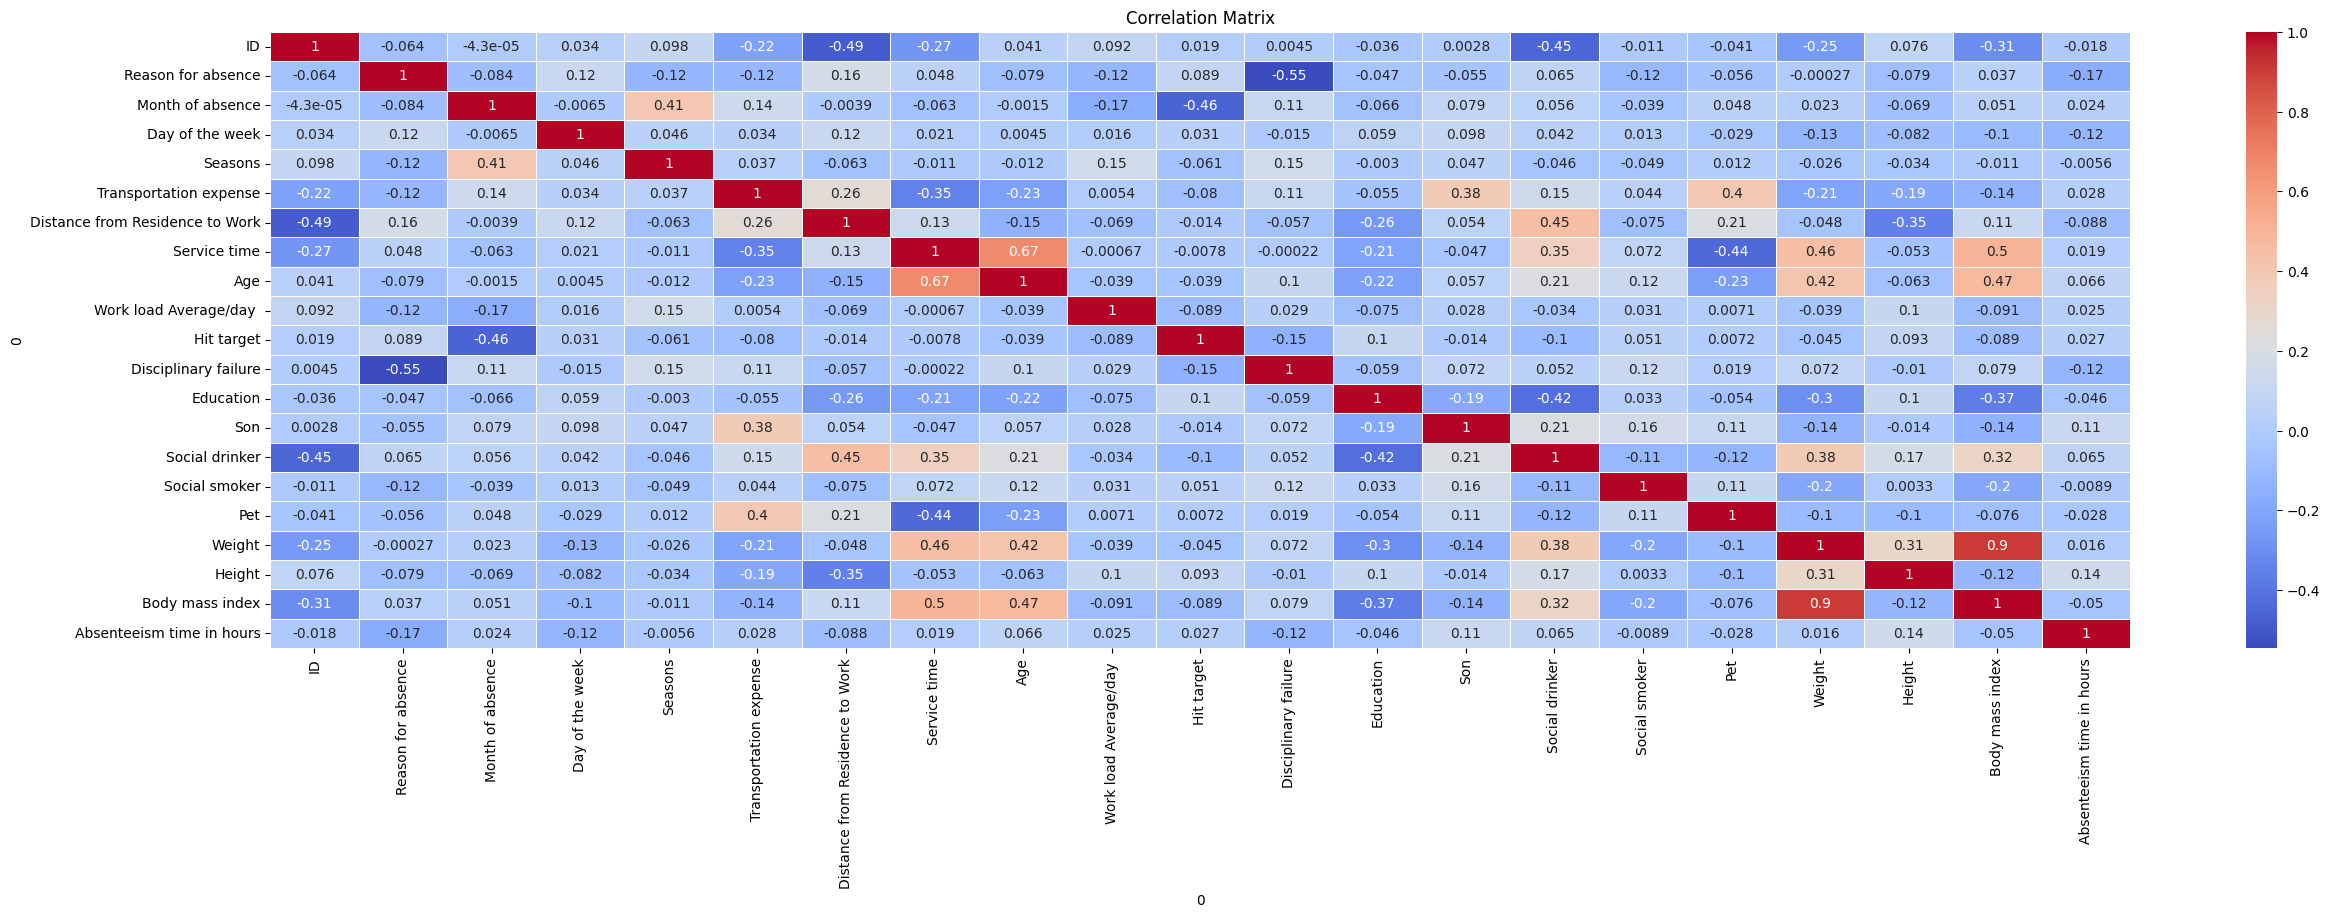

In [15]:
# draw the correlation matrix and see the correlation between variables

corr = df.iloc[:, :].corr()
plt.figure(figsize=(30, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [16]:
df['Reason for absence']

0      26
1       0
2      23
3       7
4      23
       ..
735    14
736    11
737     0
738     0
739     0
Name: Reason for absence, Length: 740, dtype: object

Text(0.5, 1.0, 'Reason for absence')

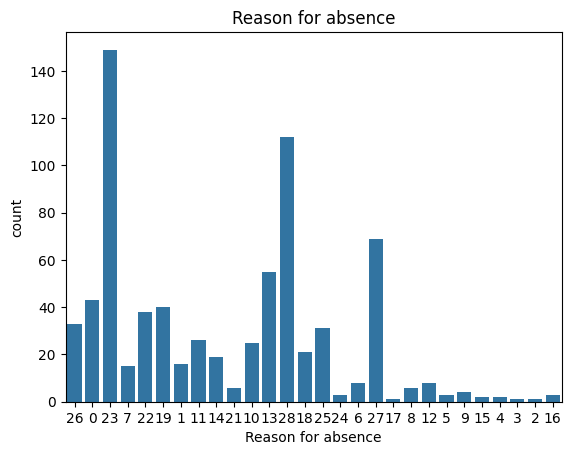

In [17]:
# take a closer look at the distribution of Reason for absence
sns.countplot(x='Reason for absence', data=df)
plt.title('Reason for absence')

The largest proportion of reason for absense is 23 which is medical consultation. The second most is 28 which is dental consultation, and the third most is 27 which is physiotherapy.

## 3. Hypothesis Formulation:

### 1. The first hypothesis is that there is a correlation between the age and the reason for absence

Text(0, 0.5, 'Age')

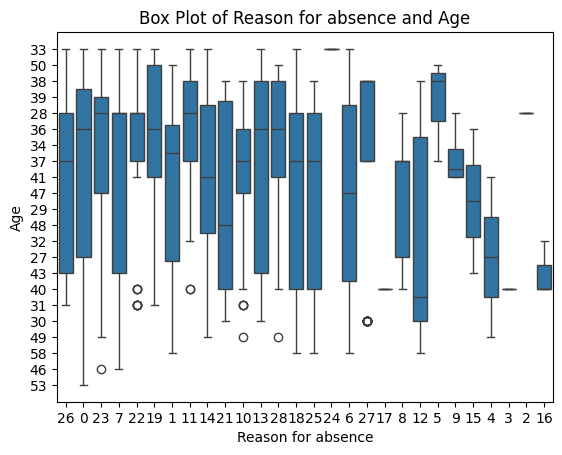

In [18]:
sns.boxplot(x='Reason for absence', y='Age', data=df)
plt.title('Box Plot of Reason for absence and Age')
plt.xlabel('Reason for absence')
plt.ylabel('Age')

From the boxplot we can see that there are some reason for absence have higher mean age than others. For example, reason 4 (Endocrine, nutritional and metabolic diseases)has a mean age around 45, and reason 7 (Diseases of the eye and adnexa)has a lower mean age of around 32. Based on the boxplot, I would say there is a correlation between the age and the reason for absence.

### 2. The second hypothesis is that the absense day of the week follows a uniform distribution

<Axes: xlabel='Day of the week', ylabel='count'>

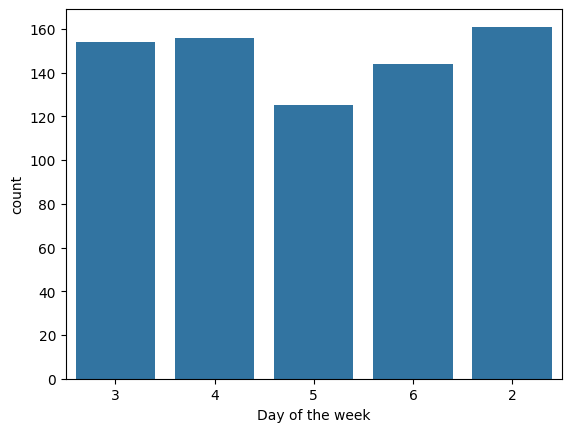

In [19]:
sns.countplot(x='Day of the week', data=df)

Since the count of different day of the week are basically the same, my hypothsis of the absense day of the week follows a uniform distribution is true.